<a href="https://colab.research.google.com/github/dardenkyle/titanic/blob/main/titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook


## Kaggle import

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"kyledarden","key":"312e88d8b1322c5084f173991b4a134d"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26          10634        193  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Streamed Spotify Songs 2024                 496KB  2024-06-15 18:50:51           2275         59  1.0              
zeesolver/data-eng-salary-2024                                  Data Developer Salary in 2024💰                   108KB  2024-06-10 07:33:22           2332         31  1.0              
rabieelkharoua/students-performance-dataset                     📚 Students 

In [ ]:
# Download Data
# ! kaggle competitions download -c 'name-of-competition'

# Use unzip command to unzip the data:

# For example,

# Create a directory named train,

# ! mkdir train

# unzip train data there,

# ! unzip train.zip -d train

In [ ]:
! kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 2.75MB/s]


In [ ]:
path = '/content/titanic.zip'

In [ ]:
! mkdir train

mkdir: cannot create directory ‘train’: File exists


In [ ]:
! unzip titanic.zip -d train

Archive:  titanic.zip
  inflating: train/gender_submission.csv  
  inflating: train/test.csv          
  inflating: train/train.csv         


In [ ]:
! ls train

gender_submission.csv  test.csv  train.csv


## Libraries/loading data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

from xgboost import XGBClassifier
from sklearn.ensemble import (AdaBoostClassifier,
                              BaggingClassifier,
                              GradientBoostingClassifier,
                              RandomForestClassifier,
                              )
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             accuracy_score,
                             recall_score,
                             precision_score,
                             f1_score,
                             make_scorer
                             )

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('train/train.csv')

In [ ]:
test = pd.read_csv('train/test.csv')

## Data Overview

### Training Set

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print('There are', df.duplicated().sum(), 'duplicated rows.')

There are 0 duplicated rows.


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


* These values will be imputed with the most likely `Embarked` category for 1st class passengers.
* Since there are only 2 rows missing and they are in the same cabin, I will manually impute these
* Most 1st class passengers embarked from C so this is the value I will use for these 2 passengers

In [ ]:
df.loc[61, 'Embarked'] = 'C'
df.loc[829, 'Embarked'] = 'C'

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
print('There are', df.isna().sum().sum(), 'missing values.')

There are 864 missing values.


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
df.describe(include=["object"]).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,891,3,S,644


In [ ]:
df['Survived'].value_counts(1)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

### Test Set

In [ ]:
test.shape

(418, 11)

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
print('There are', test.duplicated().sum(), 'duplicated rows.')

There are 0 duplicated rows.


In [ ]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
print('There are', test.isna().sum().sum(), 'missing values.')

There are 414 missing values.


In [ ]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [ ]:
test.describe(include=["object"]).T

,count,unique,top,freq
Name,418,418,"Kelly, Mr. James",1
Sex,418,2,male,266
Ticket,418,363,PC 17608,5
Cabin,91,76,B57 B59 B63 B66,3
Embarked,418,3,S,270


## Data preproceesing

In [ ]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
df[df['Cabin'].isnull() == True]['Pclass'].value_counts()

Pclass
3    479
2    168
1     40
Name: count, dtype: int64

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
df.Cabin = df.Cabin.str[0]
df.Cabin

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
# Creating a list with column labels that need to be converted from "object" to "category" data type.
cat_cols = [
    'Sex',
    'Cabin',
    'Embarked'
    ]

# Converting the columns with "object" data type to "category" data type.
df[cat_cols] = df[cat_cols].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Cabin     204 non-null    category
 8   Embarked  891 non-null    category
dtypes: category(3), float64(2), int64(4)
memory usage: 45.1 KB


## Exploratory Data Analysis (EDA)

### Functions for EDA

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate

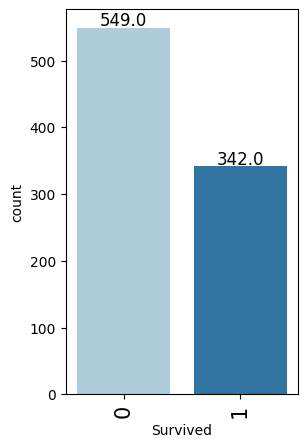

In [ ]:
labeled_barplot(df, 'Survived')

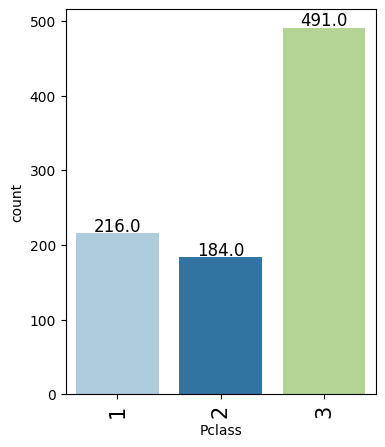

In [ ]:
labeled_barplot(df, 'Pclass')

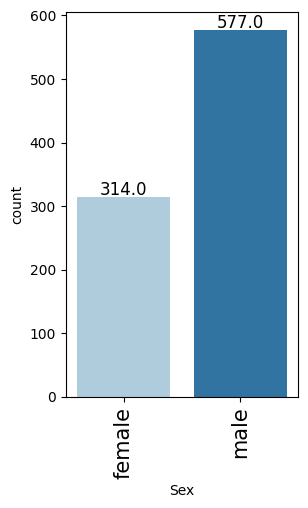

In [ ]:
labeled_barplot(df, 'Sex')

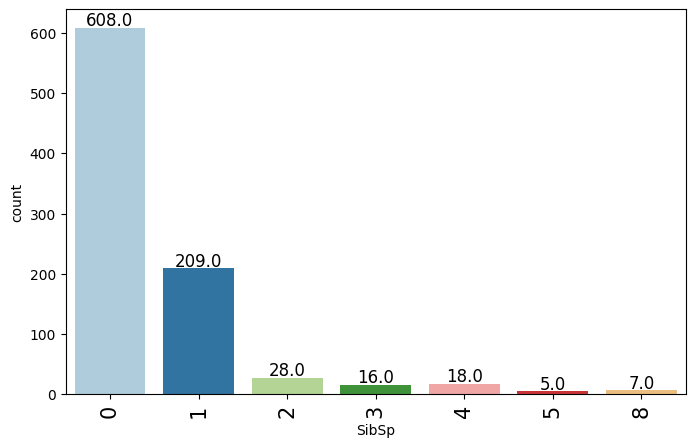

In [ ]:
labeled_barplot(df, 'SibSp')

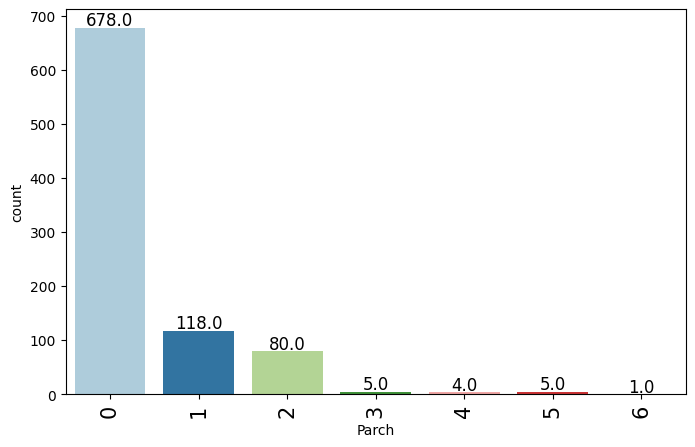

In [ ]:
labeled_barplot(df, 'Parch')

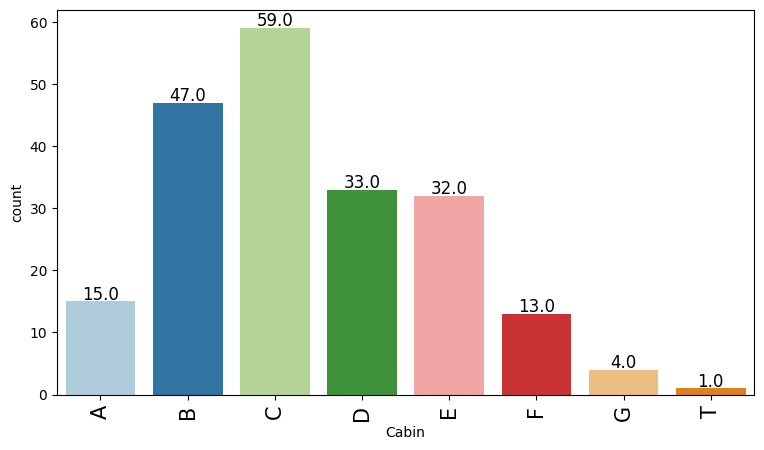

In [ ]:
labeled_barplot(df, 'Cabin')

In [ ]:
df['Cabin'].nunique()

8

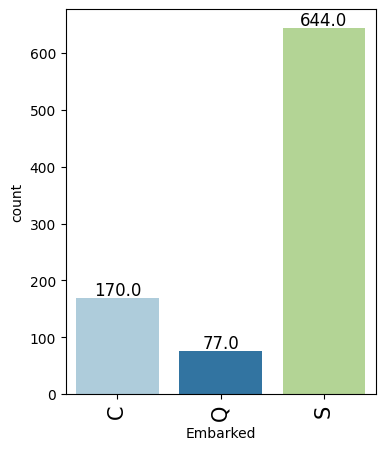

In [ ]:
labeled_barplot(df, 'Embarked')

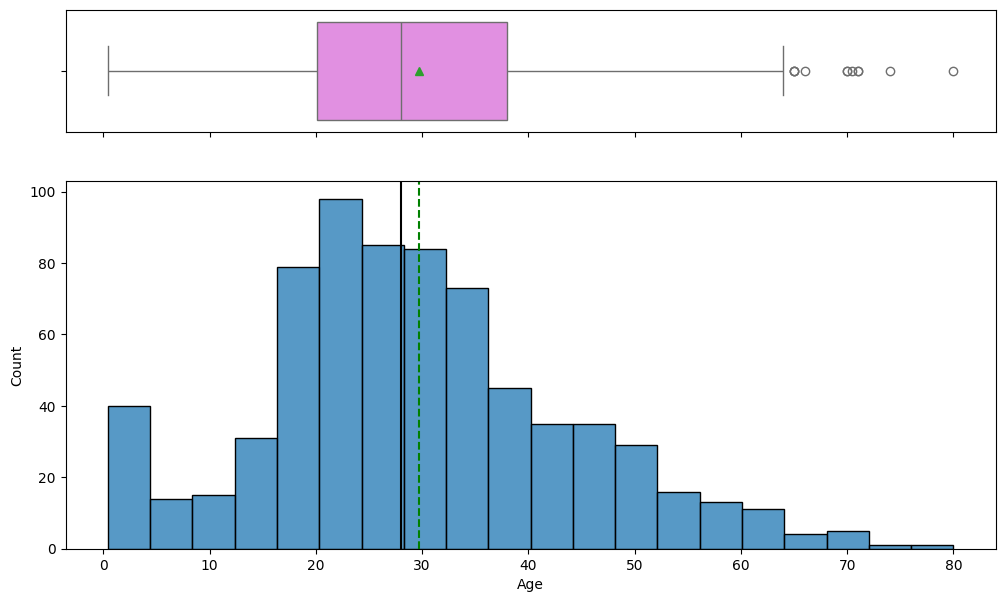

In [ ]:
histogram_boxplot(df, 'Age')

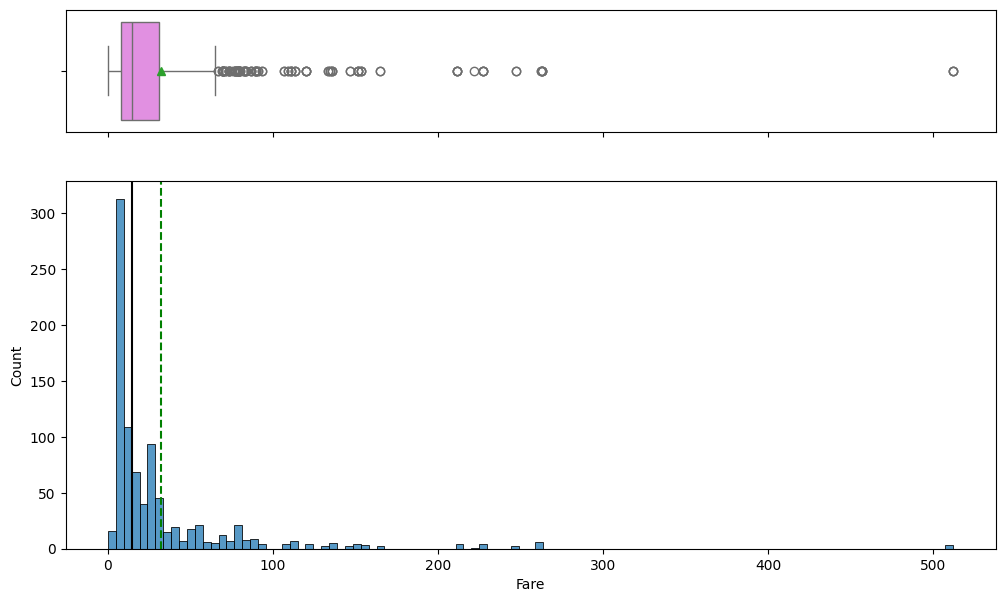

In [ ]:
histogram_boxplot(df, 'Fare')

### Multivariate

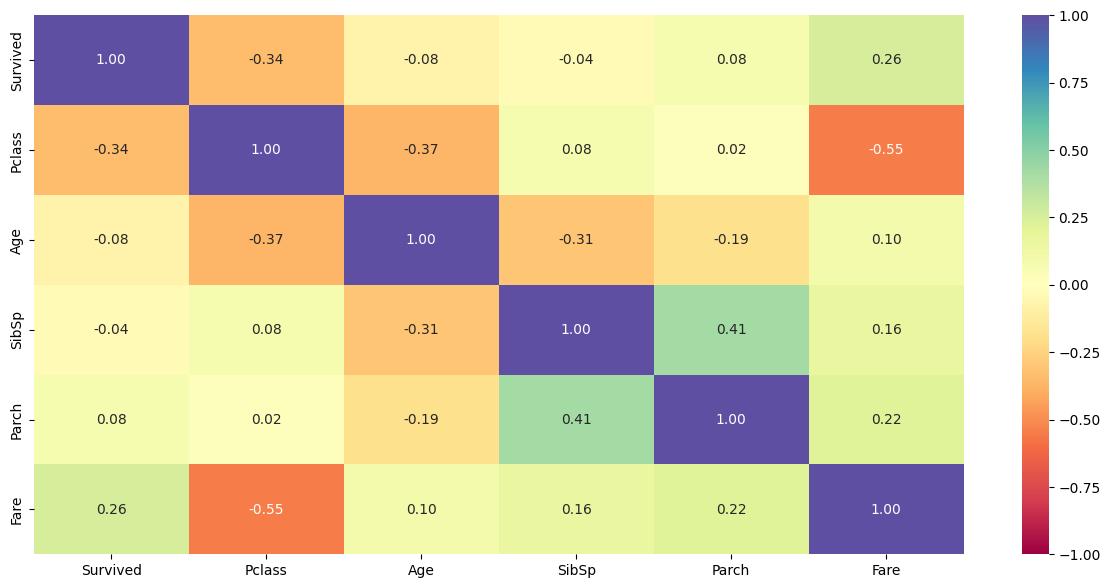

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Cabin     204 non-null    category
 8   Embarked  891 non-null    category
dtypes: category(3), float64(2), int64(4)
memory usage: 45.1 KB


Embarked    C   Q    S  All
Pclass                     
All       170  77  644  891
3          66  72  353  491
2          17   3  164  184
1          87   2  127  216
------------------------------------------------------------------------------------------------------------------------


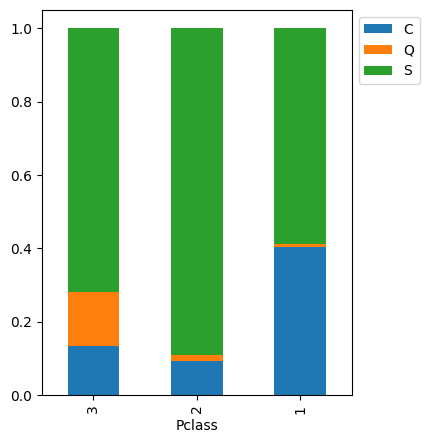

In [ ]:
stacked_barplot(df, 'Pclass', 'Embarked')

Survived    0    1  All
Pclass                 
All       549  342  891
1          80  136  216
3         372  119  491
2          97   87  184
------------------------------------------------------------------------------------------------------------------------


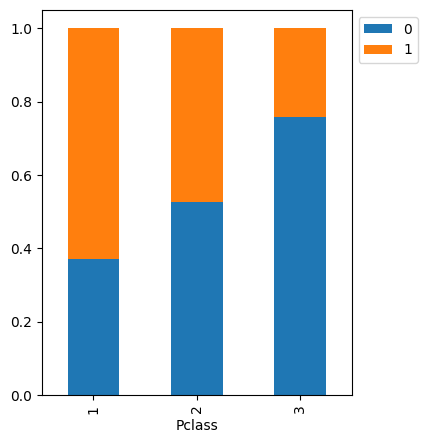

In [ ]:
stacked_barplot(df, 'Pclass', 'Survived')

Survived    0    1  All
Sex                    
All       549  342  891
female     81  233  314
male      468  109  577
------------------------------------------------------------------------------------------------------------------------


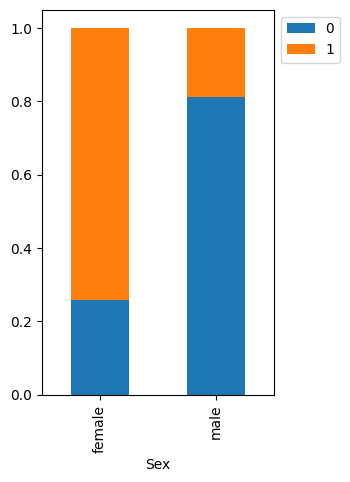

In [ ]:
stacked_barplot(df, 'Sex', 'Survived')

Survived    0    1  All
Age                    
All       424  290  714
24.0       15   15   30
22.0       16   11   27
36.0       11   11   22
35.0        7   11   18
...       ...  ...  ...
40.5        2    0    2
10.0        2    0    2
30.5        2    0    2
28.5        2    0    2
36.5        1    0    1

[89 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


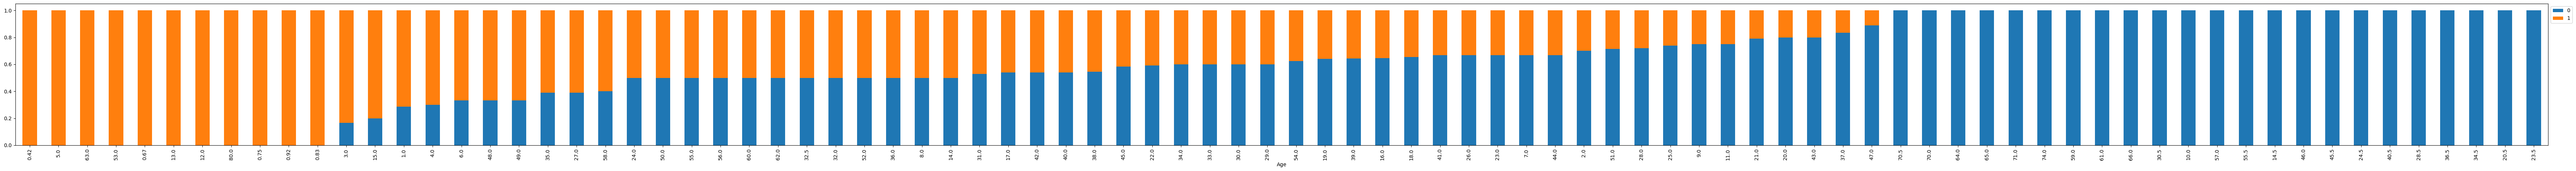

In [ ]:
stacked_barplot(df, 'Age', 'Survived')

Survived    0    1  All
SibSp                  
All       549  342  891
0         398  210  608
1          97  112  209
2          15   13   28
3          12    4   16
4          15    3   18
5           5    0    5
8           7    0    7
------------------------------------------------------------------------------------------------------------------------


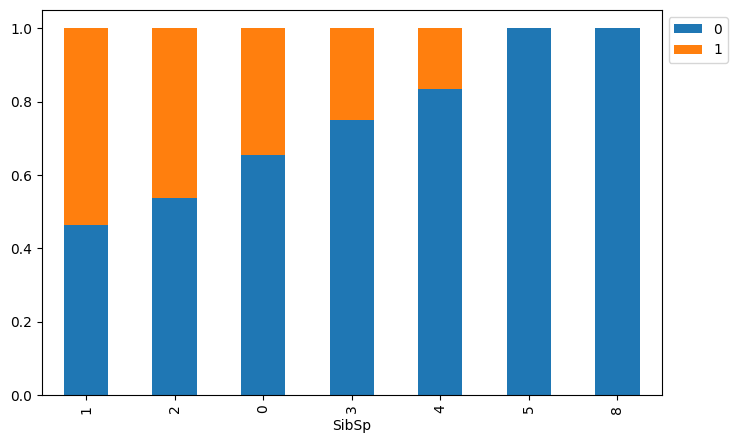

In [ ]:
stacked_barplot(df, 'SibSp', 'Survived')

Survived    0    1  All
Parch                  
All       549  342  891
0         445  233  678
1          53   65  118
2          40   40   80
3           2    3    5
5           4    1    5
4           4    0    4
6           1    0    1
------------------------------------------------------------------------------------------------------------------------


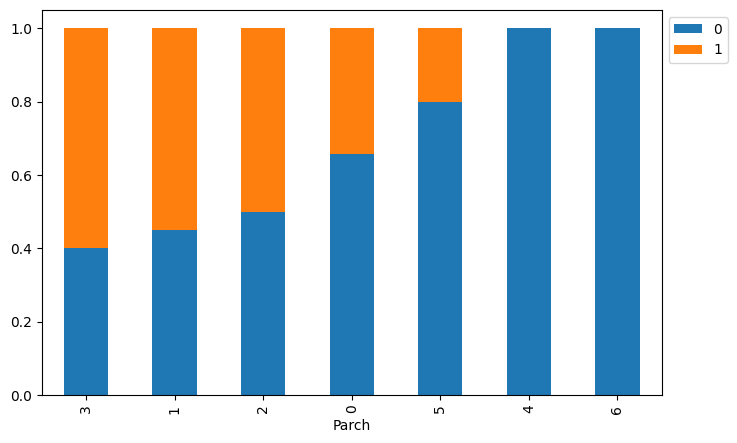

In [ ]:
stacked_barplot(df, 'Parch', 'Survived')

Survived   0    1  All
Cabin                 
All       68  136  204
B         12   35   47
C         24   35   59
D          8   25   33
E          8   24   32
F          5    8   13
A          8    7   15
G          2    2    4
T          1    0    1
------------------------------------------------------------------------------------------------------------------------


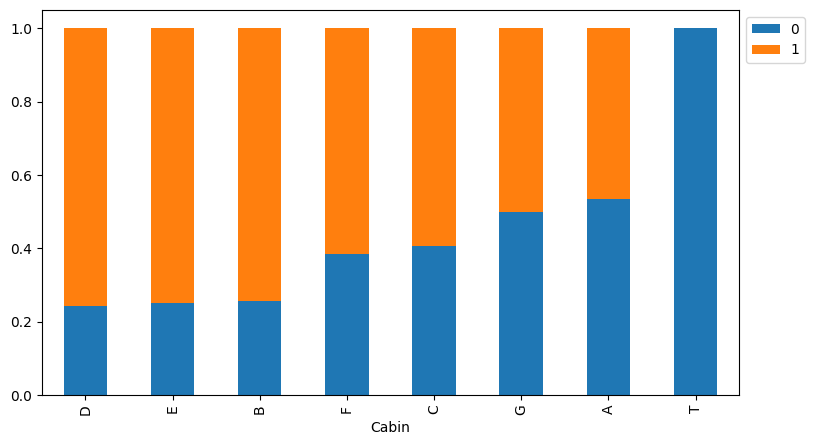

In [ ]:
stacked_barplot(df, 'Cabin', 'Survived')

Survived    0    1  All
Embarked               
All       549  342  891
S         427  217  644
C          75   95  170
Q          47   30   77
------------------------------------------------------------------------------------------------------------------------


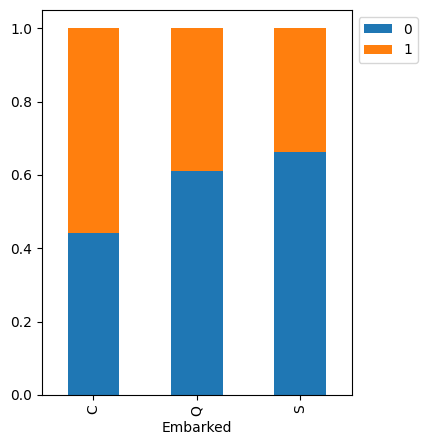

In [ ]:
stacked_barplot(df, 'Embarked', 'Survived')

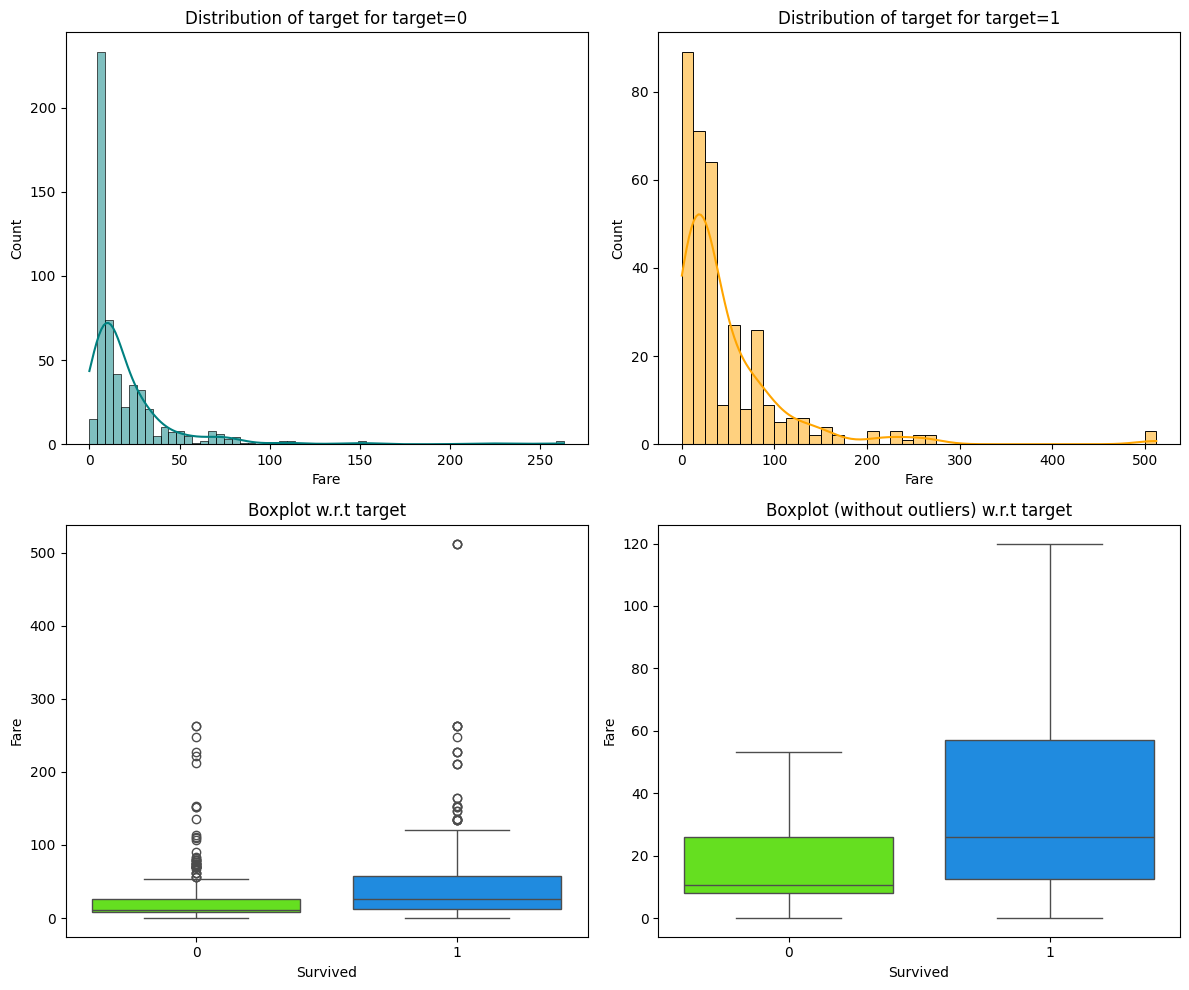

In [ ]:
distribution_plot_wrt_target(df, "Fare", "Survived")

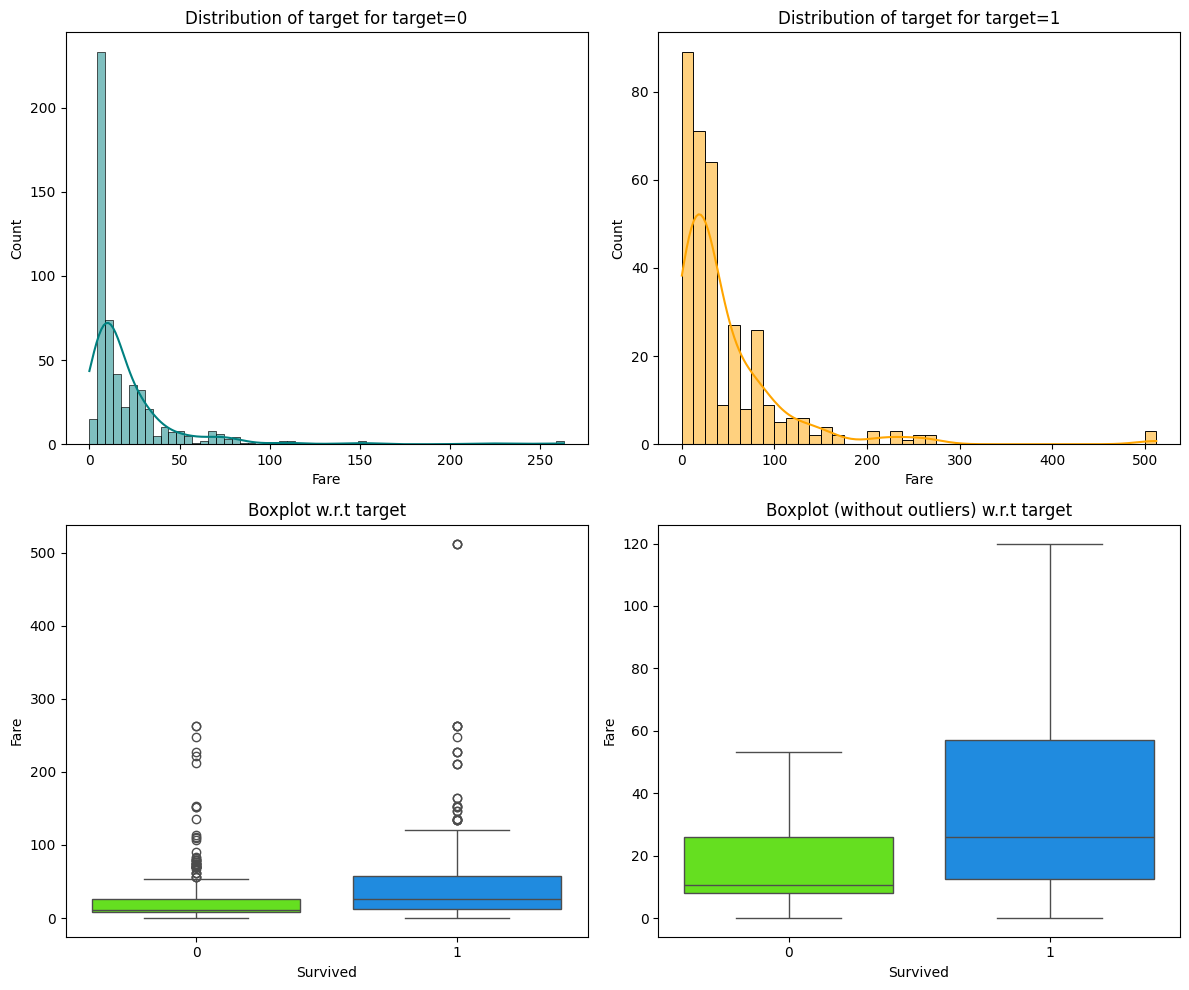

In [ ]:
distribution_plot_wrt_target(df, "Fare", "Survived")

## Data Pre-processing

### Outlier Detection

In [ ]:
# Code to be used checking for outliers.
Q1 = df.quantile(q=0.25, numeric_only=True)  # The 25th percentile.
Q3 = df.quantile(q=0.75, numeric_only=True)  # The 75th percentile.

IQR = Q3 - Q1           # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding the lower bounds for all values. All values outside these bounds are outliers.
upper = Q3 + 1.5 * IQR  # Finding the upper bounds for all values. All values outside these bounds are outliers.

In [ ]:
# Checking the percentages of outliers, as defined by the previous cell.
((df.select_dtypes(include=["float64", "int64"]) < lower)
    |(df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df) * 100

Survived     0.000000
Pclass       0.000000
Age          1.234568
SibSp        5.162738
Parch       23.905724
Fare        13.019080
dtype: float64


### Encoding Categorical Variables

In [ ]:
# Dropping first of each encoded column to reduce data frame size.

# Encoding X_train data frame categorical columns.
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
# Encoding X_val data frame categorical columns.
X_val = pd.get_dummies(X_val, columns=cat_cols, drop_first=True)
# Encoding X_test data frame categorical columns.
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

KeyError: "None of [Index(['Sex', 'Cabin', 'Embarked'], dtype='object')] are in the [columns]"

In [ ]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

* Encoded categorical columns so they can be used in the models.
* Dropped 1 dummy variable column from each category as it is unnecessary to have all columns.

In [ ]:
# Printing shape of new data frames.
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

* Observed shape of data sets.

In [ ]:
# Checking information of new data frame's columns.
X_train.info()

In [ ]:
# Checking information of new data frame's columns.
X_val.info()

In [ ]:
# Checking information of new data frame's columns.
X_test.info()

### Train-test split

In [ ]:
# Creating the independent variable data frame.
X = df.drop('Survived', axis=1)
# Creating the dependent variable data frame.
y = df['Survived']

print('Data has been split into independent and dependent variables')

Data has been split into independent and dependent variables


In [ ]:
X.shape

(891, 15)

In [ ]:
# Splitting data into training and temp data frames.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
# Splitting temp data frame into validation and test data frames.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=1, stratify=y_temp)

In [ ]:
# Printing the size of the Training, Validation, and Test data frames.
print("*"*40)
print("Shape of Training Set : ", X_train.shape)
print("Shape of Validation Set", X_val.shape)
print("Shape of Test Set : ", X_test.shape)
print("*"*40)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("*"*40)
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("*"*40)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
print("*"*40)

****************************************
Shape of Training Set :  (712, 15)
Shape of Validation Set (125, 15)
Shape of Test Set :  (54, 15)
****************************************
Percentage of classes in training set:
Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64
****************************************
Percentage of classes in validation set:
Survived
0    0.616
1    0.384
Name: proportion, dtype: float64
****************************************
Percentage of classes in test set:
Survived
0    0.611111
1    0.388889
Name: proportion, dtype: float64
****************************************


### Missing value imputation




In [ ]:
# Printing the number of na values in each data frame.
# The columns with na values are aleady known from previous lines.
print("Number of X_train na values:", X_train.isna().sum().sum())
print("*" * 30)
print("Number of X_val na values:", X_val.isna().sum().sum())
print("*" * 30)
print("Number of X_test na values:", X_test.isna().sum().sum())

Number of X_train na values: 139
******************************
Number of X_val na values: 28
******************************
Number of X_test na values: 10


In [ ]:
df.isna().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_male        0
Cabin_B         0
Cabin_C         0
Cabin_D         0
Cabin_E         0
Cabin_F         0
Cabin_G         0
Cabin_T         0
Embarked_Q      0
Embarked_S      0
dtype: int64

* Observed how many Null values are present in the data sets.

In [ ]:
# Creating an imputer to impute values by the mode.
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# Creating an imputer to impute na values to 'Unknown'
imp_unknown = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')

In [ ]:
# Creating list of column labels that need to be imputed.
col_impute = ['Age']
col_impute_unknown = ['Cabin']

In [ ]:
# Imputing X_train columns.
X_train[col_impute] = imp_mean.fit_transform(X_train[col_impute])
# Imputing X_val columns.
X_val[col_impute] = imp_mean.fit_transform(X_val[col_impute])
# Imputing X_test columns.
X_test[col_impute] = imp_mean.fit_transform(X_test[col_impute])

In [ ]:
# Printing the number of na values in each data frame.
print("Number of X_train na values:", X_train.isna().sum().sum())
print("*" * 30)
print("Number of X_val na values:", X_val.isna().sum().sum())
print("*" * 30)
print("Number of X_test na values:", X_test.isna().sum().sum())

Number of X_train na values: 0
******************************
Number of X_val na values: 0
******************************
Number of X_test na values: 0


In [ ]:
# # Imputing X_train columns.
# X_train[col_impute_unknown] = imp_unknown.fit_transform(X_train[col_impute_unknown])
# # Imputing X_val columns.
# X_val[col_impute_unknown] = imp_unknown.fit_transform(X_val[col_impute_unknown])
# # Imputing X_test columns.
# X_test[col_impute_unknown] = imp_unknown.fit_transform(X_test[col_impute_unknown])

KeyError: "None of [Index(['Cabin'], dtype='object')] are in the [columns]"

In [ ]:
# Printing the number of na values in each data frame.
print("Number of X_train na values:", X_train.isna().sum().sum())
print("*" * 30)
print("Number of X_val na values:", X_val.isna().sum().sum())
print("*" * 30)
print("Number of X_test na values:", X_test.isna().sum().sum())

Number of X_train na values: 0
******************************
Number of X_val na values: 0
******************************
Number of X_test na values: 0


In [ ]:
# Printing the size of the Training, Validation, and Test data frames.
print("*"*40)
print("Shape of Training Set : ", X_train.shape)
print("Shape of Validation Set", X_val.shape)
print("Shape of Test Set : ", X_test.shape)
print("*"*40)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("*"*40)
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("*"*40)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
print("*"*40)

****************************************
Shape of Training Set :  (712, 15)
Shape of Validation Set (125, 15)
Shape of Test Set :  (54, 15)
****************************************
Percentage of classes in training set:
Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64
****************************************
Percentage of classes in validation set:
Survived
0    0.616
1    0.384
Name: proportion, dtype: float64
****************************************
Percentage of classes in test set:
Survived
0    0.611111
1    0.388889
Name: proportion, dtype: float64
****************************************


In [ ]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S
368,3,29.673508,0,0,7.750,False,False,False,False,False,False,False,False,True,False
542,3,11.000000,4,2,31.275,False,False,False,False,False,False,False,False,False,True
49,3,18.000000,1,0,17.800,False,False,False,False,False,False,False,False,False,True
667,3,29.673508,0,0,7.775,True,False,False,False,False,False,False,False,False,True
297,1,2.000000,1,2,151.550,False,False,True,False,False,False,False,False,False,True


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True Positives (TP) are existing customers correctly predicted by the model.
- True Negatives (TN) are atritioned customers correctly predicted by the model.
- False Positives (FP) are atritioned customers incorrectly predicted as an existing customer by the model.
- False Negatives (FN) are existing customers incorrectly predicted as an atritioned customer by the model.



**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of customer attritions are predicted correctly by the model.
* We would want Precision to be maximized as greater the Precision, the higher the chances of minimizing False Positives.
* We want to minimize False Positives because if a model predicts that a customer will not attrit, but they do, the customer is lost.

In [ ]:
# Defining a function to compute different metrics to check performance of a classification model built using sklearn.
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables.
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # To compute Accuracy.
    recall = recall_score(target, pred)  # To compute Recall.
    precision = precision_score(target, pred)  # To compute Precision.
    f1 = f1_score(target, pred)  # To compute F1-score.

    # Creating a dataframe of metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
# Defining a function to create a confusion matrix to check TP, FP, TN, adn FN values.
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predicting using the independent variables.
    y_pred = model.predict(predictors)
    # Creating the confusion matrix.
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # Plotting the confusion matrix.
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

In [ ]:
models = []  # Empty list to store all the models.

# Appending models into the list.
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

# Printing model performance scores on training data.
print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

# Printing model performance scores on validation data.
print("\n" "Validation Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9662921348314606
Random forest: 0.9833641404805914
AdaBoost: 0.8007448789571695
GradientBoost: 0.8464566929133858
XGBoost: 0.9664179104477612

Validation Performance:

Bagging: 0.7333333333333334
Random forest: 0.7446808510638298
AdaBoost: 0.6521739130434783
GradientBoost: 0.7415730337078651
XGBoost: 0.8125


### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique.
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

* Oversampled the training data to fit next models with.

In [ ]:
models_over = []  # Empty list to store all the models.

# Appending models into the list
models_over.append(("Bagging", BaggingClassifier(random_state=1)))
models_over.append(("Random forest", RandomForestClassifier(random_state=1)))
models_over.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_over.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models_over.append(("XGBoost", XGBClassifier(random_state=1)))

# Printing model performance scores on training data.
print("\n" "Training Performance:" "\n")
for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores = precision_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

# Printing model performance scores on validation data.
print("\n" "Validation Performance:" "\n")
for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores_val = precision_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9907192575406032
Random forest: 0.9953810623556582
AdaBoost: 0.826879271070615
GradientBoost: 0.9084158415841584
XGBoost: 0.9861111111111112

Validation Performance:

Bagging: 0.75
Random forest: 0.72
AdaBoost: 0.6470588235294118
GradientBoost: 0.723404255319149
XGBoost: 0.75


### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data.
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

* Undersampled the training data to fit the next models with.

In [ ]:
models_un = []  # Empty list to store all the models.

# Appending models into the list.
models_un.append(("Bagging", BaggingClassifier(random_state=1)))
models_un.append(("Random forest", RandomForestClassifier(random_state=1)))
models_un.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_un.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models_un.append(("XGBoost", XGBClassifier(random_state=1)))

# Printing model performance scores on training data.
print("\n" "Training Performance:" "\n")
for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores = precision_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

# Printing model performance scores on validation data.
print("\n" "Validation Performance:" "\n")
for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores_val = precision_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9923371647509579
Random forest: 0.9926470588235294
AdaBoost: 0.8254545454545454
GradientBoost: 0.9302325581395349
XGBoost: 0.978021978021978

Validation Performance:

Bagging: 0.7391304347826086
Random forest: 0.7090909090909091
AdaBoost: 0.6538461538461539
GradientBoost: 0.76
XGBoost: 0.6451612903225806


### XGBoost (original training data)

In [ ]:
# Defining the model.
XGB_org = XGBClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid = {
            'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Defining the scorer.
scorer = make_scorer(f1_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=XGB_org, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train,y_train)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': 100, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.7536025472112428:


In [ ]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
XGB_org_tuned = XGBClassifier(
    random_state=1,
    subsample=0.7,
    scale_pos_weight=1,
    n_estimators=100,
    learning_rate=0.05,
    gamma=1)

# Fitting the model to the original training data.
XGB_org_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
 # Checking the tuned model's performance metrics on the original training data.
model_performance_classification_sklearn(XGB_org_tuned, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.896067,0.809524,0.909465,0.856589


In [ ]:
# Saving the tuned model's scores for later comparison.
XGB_org_tuned_train_scores = model_performance_classification_sklearn(XGB_org_tuned, X_train, y_train)

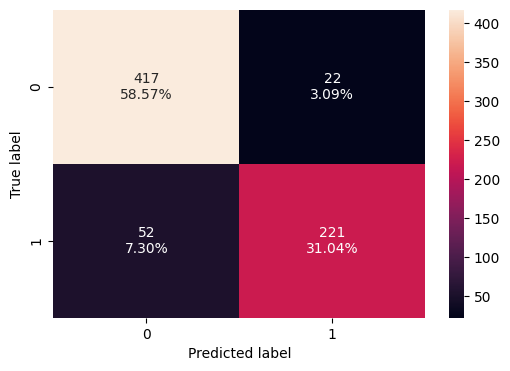

In [ ]:
# Creating the confusion matrix for the tuned model's performance on the original training data.
confusion_matrix_sklearn(XGB_org_tuned, X_train, y_train)

In [ ]:
 # Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(XGB_org_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.824,0.75,0.782609,0.765957


In [ ]:
# Saving the tuned model's scores for later comparison.
XGB_org_tuned_val_scores = model_performance_classification_sklearn(XGB_org_tuned, X_val, y_val)

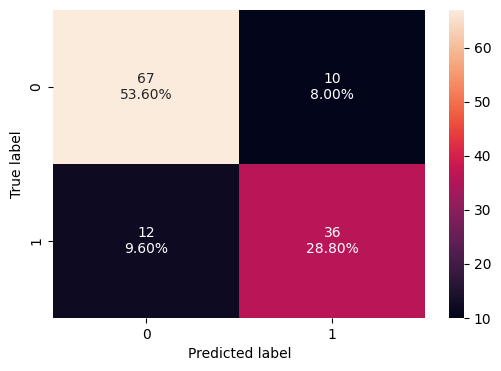

In [ ]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(XGB_org_tuned, X_val, y_val)

In [ ]:
 # Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(XGB_org_tuned, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.833333,0.714286,0.833333,0.769231
